In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
app=pd.read_csv('appstore_games.csv')
app.head()

,URL,ID,Name,Subtitle,Icon URL,Average User Rating,User Rating Count,Price,In-app Purchases,Description,Developer,Age Rating,Languages,Size,Primary Genre,Genres,Original Release Date,Current Version Release Date
0,https://apps.apple.com/us/app/sudoku/id284921427,284921427,Sudoku,NaN,https://is2-ssl.mzstatic.com/image/thumb/Purpl...,4.0,3553.0,2.99,NaN,"Join over 21,000,000 of our fans and download ...",Mighty Mighty Good Games,4+,"DA, NL, EN, FI, FR, DE, IT, JA, KO, NB, PL, PT...",15853568.0,Games,"Games, Strategy, Puzzle",11/07/2008,30/05/2017
1,https://apps.apple.com/us/app/reversi/id284926400,284926400,Reversi,NaN,https://is4-ssl.mzstatic.com/image/thumb/Purpl...,3.5,284.0,1.99,NaN,"The classic game of Reversi, also known as Oth...",Kiss The Machine,4+,EN,12328960.0,Games,"Games, Strategy, Board",11/07/2008,17/05/2018
2,https://apps.apple.com/us/app/morocco/id284946595,284946595,Morocco,NaN,https://is5-ssl.mzstatic.com/image/thumb/Purpl...,3.0,8376.0,0.00,NaN,Play the classic strategy game Othello (also k...,Bayou Games,4+,EN,674816.0,Games,"Games, Board, Strategy",11/07/2008,5/09/2017
3,https://apps.apple.com/us/app/sudoku-free/id28...,285755462,Sudoku (Free),NaN,https://is3-ssl.mzstatic.com/image/thumb/Purpl...,3.5,190394.0,0.00,NaN,"Top 100 free app for over a year.\nRated ""Best...",Mighty Mighty Good Games,4+,"DA, NL, EN, FI, FR, DE, IT, JA, KO, NB, PL, PT...",21552128.0,Games,"Games, Strategy, Puzzle",23/07/2008,30/05/2017
4,https://apps.apple.com/us/app/senet-deluxe/id2...,285831220,Senet Deluxe,NaN,https://is1-ssl.mzstatic.com/image/thumb/Purpl...,3.5,28.0,2.99,NaN,"""Senet Deluxe - The Ancient Game of Life and A...",RoGame Software,4+,"DA, NL, EN, FR, DE, EL, IT, JA, KO, NO, PT, RU...",34689024.0,Games,"Games, Strategy, Board, Education",18/07/2008,22/07/2018


In [16]:
app_f=app.copy()
#Drop rows and colums not used
app_f=app_f.drop(columns="URL")
app_f=app_f.drop(columns="Icon URL")

In [17]:
app_f.columns=['ID', 'Name','Subtitle','User_Rating','User_Rating_Count','Price','In_App_Purchase','Desc','Dev','Age_Rating','Languages','Size','Primary_Genre','Genre','Release_Date','Current_Version_Date']


In [18]:
#Games with no User rating is dropped
app_f=app_f[pd.notnull(app_f['User_Rating'])]


In [22]:
import datetime
app_f['Release_Date']=pd.to_datetime(app_f['Release_Date'])
app_f['Current_Version_Date']=pd.to_datetime(app_f['Current_Version_Date'])
#new column to show the update gap
app_f['Update_Gap']=app_f.Current_Version_Date - app_f.Release_Date
app_f.head()

,ID,Name,Subtitle,User_Rating,User_Rating_Count,Price,In_App_Purchase,Desc,Dev,Age_Rating,Languages,Size,Primary_Genre,Genre,Release_Date,Current_Version_Date,Update_Gap
0,284921427,Sudoku,NaN,4.0,3553.0,2.99,NaN,"Join over 21,000,000 of our fans and download ...",Mighty Mighty Good Games,4+,"DA, NL, EN, FI, FR, DE, IT, JA, KO, NB, PL, PT...",15853568.0,Games,"Games, Strategy, Puzzle",2008-11-07,2017-05-30,3126 days
1,284926400,Reversi,NaN,3.5,284.0,1.99,NaN,"The classic game of Reversi, also known as Oth...",Kiss The Machine,4+,EN,12328960.0,Games,"Games, Strategy, Board",2008-11-07,2018-05-17,3478 days
2,284946595,Morocco,NaN,3.0,8376.0,0.00,NaN,Play the classic strategy game Othello (also k...,Bayou Games,4+,EN,674816.0,Games,"Games, Board, Strategy",2008-11-07,2017-05-09,3105 days
3,285755462,Sudoku (Free),NaN,3.5,190394.0,0.00,NaN,"Top 100 free app for over a year.\nRated ""Best...",Mighty Mighty Good Games,4+,"DA, NL, EN, FI, FR, DE, IT, JA, KO, NB, PL, PT...",21552128.0,Games,"Games, Strategy, Puzzle",2008-07-23,2017-05-30,3233 days
4,285831220,Senet Deluxe,NaN,3.5,28.0,2.99,NaN,"""Senet Deluxe - The Ancient Game of Life and A...",RoGame Software,4+,"DA, NL, EN, FR, DE, EL, IT, JA, KO, NO, PT, RU...",34689024.0,Games,"Games, Strategy, Board, Education",2008-07-18,2018-07-22,3656 days


In [20]:
#to drop games having user rating less than 200 and release date to update date less than 6 months
Low_User_Count = (app_f[app_f.User_Rating_Count < 200].index) & app_f[app_f.Update_Gap < datetime.timedelta(days = 175)].index
app_f.drop(Low_User_Count , inplace=True)

In [23]:
app_genre=app_f.copy()
app_genre['Genre'] = app_genre['Genre'].str.replace(',', '').str.replace('Games', '').str.replace('Entertainment', '').str.replace('Strategy', '') 

In [24]:
app_genre.head()

,ID,Name,Subtitle,User_Rating,User_Rating_Count,Price,In_App_Purchase,Desc,Dev,Age_Rating,Languages,Size,Primary_Genre,Genre,Release_Date,Current_Version_Date,Update_Gap
0,284921427,Sudoku,NaN,4.0,3553.0,2.99,NaN,"Join over 21,000,000 of our fans and download ...",Mighty Mighty Good Games,4+,"DA, NL, EN, FI, FR, DE, IT, JA, KO, NB, PL, PT...",15853568.0,Games,Puzzle,2008-11-07,2017-05-30,3126 days
1,284926400,Reversi,NaN,3.5,284.0,1.99,NaN,"The classic game of Reversi, also known as Oth...",Kiss The Machine,4+,EN,12328960.0,Games,Board,2008-11-07,2018-05-17,3478 days
2,284946595,Morocco,NaN,3.0,8376.0,0.00,NaN,Play the classic strategy game Othello (also k...,Bayou Games,4+,EN,674816.0,Games,Board,2008-11-07,2017-05-09,3105 days
3,285755462,Sudoku (Free),NaN,3.5,190394.0,0.00,NaN,"Top 100 free app for over a year.\nRated ""Best...",Mighty Mighty Good Games,4+,"DA, NL, EN, FI, FR, DE, IT, JA, KO, NB, PL, PT...",21552128.0,Games,Puzzle,2008-07-23,2017-05-30,3233 days
4,285831220,Senet Deluxe,NaN,3.5,28.0,2.99,NaN,"""Senet Deluxe - The Ancient Game of Life and A...",RoGame Software,4+,"DA, NL, EN, FR, DE, EL, IT, JA, KO, NO, PT, RU...",34689024.0,Games,Board Education,2008-07-18,2018-07-22,3656 days


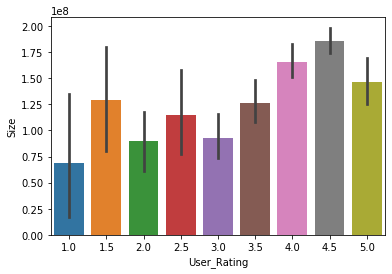

In [32]:
sns.barplot(x='User_Rating',y='Size',data = app_genre)

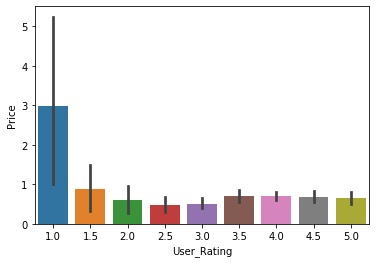

In [35]:
sns.barplot(x='User_Rating',y='Price',data = app_genre)

In [ ]:
sns.barplot(x='User_Rating',y='Genre',data = app_genre)

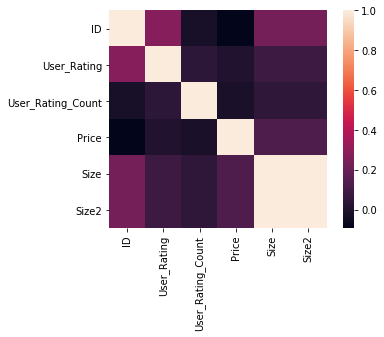

In [34]:
corr = app_genre.corr()
sns.heatmap(corr,vmax = 1,square = True)